In [42]:
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv', index_col='id', parse_dates = ['pickup_datetime'])
test = pd.read_csv('test.csv', index_col='id', parse_dates = ['pickup_datetime'])
import seaborn as sns

In [43]:
from catboost import CatBoostRegressor

In [44]:
columns = ["vendor_id", "passenger_count", "store_and_fwd_flag"]

In [45]:
df["dist"] = np.arccos(np.clip(np.sin(df['pickup_latitude']) * np.sin(df['dropoff_latitude'])+ np.cos(df['pickup_latitude'])
               * np.cos(df['dropoff_latitude'])
                   * np.cos(df['pickup_longitude'] - df['dropoff_longitude']), a_min = 0, a_max = 0.9999999)) * 6371000

In [46]:
df = df.fillna(0)

In [47]:
df["passenger_count"].value_counts()

1    775226
2    158025
5     58449
3     44892
6     36122
4     21219
0        46
7         2
9         1
8         1
Name: passenger_count, dtype: int64

In [48]:
df

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist
id,,,,,,,,,,
id0521922,1,2016-05-12 01:43:20,1,-73.994102,40.744423,-73.989967,40.726486,N,438,117239.481975
id3885136,1,2016-04-25 09:48:28,1,-73.990944,40.766834,-74.003258,40.738605,N,1050,196089.462093
id0463847,2,2016-05-31 08:41:40,1,-73.870552,40.773609,-73.980827,40.759129,N,2769,706663.279190
id3573732,2,2016-03-09 11:37:51,1,-73.958435,40.781597,-73.963631,40.808296,N,732,173283.761416
id3524847,1,2016-01-17 21:45:45,3,-73.776627,40.645306,-73.700447,40.620991,N,1442,499531.526201
...,...,...,...,...,...,...,...,...,...,...
id1753868,2,2016-03-25 07:11:49,2,-73.955032,40.777328,-74.006203,40.749424,N,1281,370465.022864
id2204747,1,2016-02-16 18:01:45,1,-73.973618,40.763920,-73.983849,40.749874,N,833,110573.219524
id3043606,2,2016-01-26 19:22:29,1,-74.006195,40.734283,-73.949608,40.785282,N,1285,484420.110066


In [49]:
df.head() 

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist
id,,,,,,,,,,
id0521922,1,2016-05-12 01:43:20,1,-73.994102,40.744423,-73.989967,40.726486,N,438,117239.481975
id3885136,1,2016-04-25 09:48:28,1,-73.990944,40.766834,-74.003258,40.738605,N,1050,196089.462093
id0463847,2,2016-05-31 08:41:40,1,-73.870552,40.773609,-73.980827,40.759129,N,2769,706663.279190
id3573732,2,2016-03-09 11:37:51,1,-73.958435,40.781597,-73.963631,40.808296,N,732,173283.761416
id3524847,1,2016-01-17 21:45:45,3,-73.776627,40.645306,-73.700447,40.620991,N,1442,499531.526201


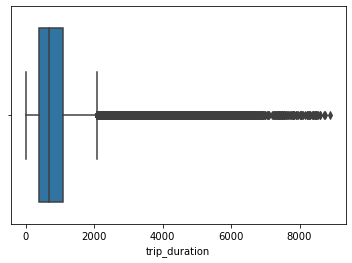

In [88]:
ax = sns.boxplot(x = df["trip_duration"])

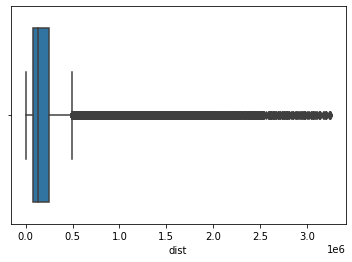

In [59]:
ax = sns.boxplot(x = df["dist"])

In [75]:
df = df.drop(df[df['trip_duration'] > 9000].index, axis=0)
df = df.drop(df[df['dist'] > 3300000].index, axis=0)

In [76]:
df1 = df.drop("trip_duration", axis = 1)
trip_duration = df["trip_duration"]

In [77]:
CatBoost = CatBoostRegressor(cat_features = columns, depth = 1) #depth = 11

In [78]:
Cat = CatBoost.fit(df1, trip_duration)

Learning rate set to 0.13559
0:	learn: 622.1157600	total: 131ms	remaining: 2m 11s
1:	learn: 593.8703211	total: 238ms	remaining: 1m 58s
2:	learn: 569.2137553	total: 323ms	remaining: 1m 47s
3:	learn: 547.9489070	total: 413ms	remaining: 1m 42s
4:	learn: 529.8094669	total: 526ms	remaining: 1m 44s
5:	learn: 514.2111399	total: 620ms	remaining: 1m 42s
6:	learn: 500.5940857	total: 706ms	remaining: 1m 40s
7:	learn: 488.7786657	total: 803ms	remaining: 1m 39s
8:	learn: 477.9082083	total: 889ms	remaining: 1m 37s
9:	learn: 468.9764127	total: 986ms	remaining: 1m 37s
10:	learn: 460.7767725	total: 1.07s	remaining: 1m 36s
11:	learn: 453.2716867	total: 1.16s	remaining: 1m 35s
12:	learn: 447.0556744	total: 1.25s	remaining: 1m 34s
13:	learn: 441.3981215	total: 1.34s	remaining: 1m 34s
14:	learn: 436.5956434	total: 1.42s	remaining: 1m 33s
15:	learn: 431.9431135	total: 1.51s	remaining: 1m 32s
16:	learn: 428.2652262	total: 1.6s	remaining: 1m 32s
17:	learn: 424.8283873	total: 1.69s	remaining: 1m 32s
18:	learn:

152:	learn: 387.7996354	total: 15.1s	remaining: 1m 23s
153:	learn: 387.7753814	total: 15.2s	remaining: 1m 23s
154:	learn: 387.7513394	total: 15.3s	remaining: 1m 23s
155:	learn: 387.7270256	total: 15.4s	remaining: 1m 23s
156:	learn: 387.7032161	total: 15.5s	remaining: 1m 23s
157:	learn: 387.6805983	total: 15.6s	remaining: 1m 22s
158:	learn: 387.6581743	total: 15.7s	remaining: 1m 22s
159:	learn: 387.6331578	total: 15.8s	remaining: 1m 22s
160:	learn: 387.6105838	total: 15.8s	remaining: 1m 22s
161:	learn: 387.5881343	total: 16s	remaining: 1m 22s
162:	learn: 387.5659468	total: 16.1s	remaining: 1m 22s
163:	learn: 387.5443837	total: 16.2s	remaining: 1m 22s
164:	learn: 387.5228620	total: 16.3s	remaining: 1m 22s
165:	learn: 387.5012753	total: 16.4s	remaining: 1m 22s
166:	learn: 387.4807334	total: 16.5s	remaining: 1m 22s
167:	learn: 387.4590715	total: 16.6s	remaining: 1m 22s
168:	learn: 387.4391144	total: 16.7s	remaining: 1m 21s
169:	learn: 387.4195083	total: 16.8s	remaining: 1m 21s
170:	learn: 

302:	learn: 385.6689145	total: 29.8s	remaining: 1m 8s
303:	learn: 385.6608807	total: 29.9s	remaining: 1m 8s
304:	learn: 385.6517862	total: 29.9s	remaining: 1m 8s
305:	learn: 385.6437276	total: 30s	remaining: 1m 8s
306:	learn: 385.6340489	total: 30.1s	remaining: 1m 7s
307:	learn: 385.6260701	total: 30.2s	remaining: 1m 7s
308:	learn: 385.6181786	total: 30.3s	remaining: 1m 7s
309:	learn: 385.6095594	total: 30.4s	remaining: 1m 7s
310:	learn: 385.6015892	total: 30.5s	remaining: 1m 7s
311:	learn: 385.5936385	total: 30.5s	remaining: 1m 7s
312:	learn: 385.5857205	total: 30.6s	remaining: 1m 7s
313:	learn: 385.5777657	total: 30.7s	remaining: 1m 7s
314:	learn: 385.5698863	total: 30.8s	remaining: 1m 6s
315:	learn: 385.5618997	total: 30.9s	remaining: 1m 6s
316:	learn: 385.5540301	total: 31s	remaining: 1m 6s
317:	learn: 385.5449661	total: 31.1s	remaining: 1m 6s
318:	learn: 385.5372324	total: 31.1s	remaining: 1m 6s
319:	learn: 385.5295833	total: 31.2s	remaining: 1m 6s
320:	learn: 385.5210243	total: 3

456:	learn: 384.7019907	total: 43.1s	remaining: 51.2s
457:	learn: 384.6972899	total: 43.2s	remaining: 51.1s
458:	learn: 384.6929637	total: 43.3s	remaining: 51s
459:	learn: 384.6882446	total: 43.3s	remaining: 50.9s
460:	learn: 384.6837771	total: 43.4s	remaining: 50.8s
461:	learn: 384.6794355	total: 43.5s	remaining: 50.7s
462:	learn: 384.6749876	total: 43.6s	remaining: 50.6s
463:	learn: 384.6706030	total: 43.7s	remaining: 50.5s
464:	learn: 384.6660210	total: 43.8s	remaining: 50.4s
465:	learn: 384.6613067	total: 43.9s	remaining: 50.3s
466:	learn: 384.6567918	total: 43.9s	remaining: 50.2s
467:	learn: 384.6521887	total: 44s	remaining: 50s
468:	learn: 384.6478157	total: 44.1s	remaining: 50s
469:	learn: 384.6432730	total: 44.2s	remaining: 49.8s
470:	learn: 384.6388182	total: 44.3s	remaining: 49.7s
471:	learn: 384.6343945	total: 44.4s	remaining: 49.6s
472:	learn: 384.6298964	total: 44.5s	remaining: 49.5s
473:	learn: 384.6255571	total: 44.5s	remaining: 49.4s
474:	learn: 384.6211142	total: 44.6s

609:	learn: 384.1160256	total: 56.3s	remaining: 36s
610:	learn: 384.1130262	total: 56.4s	remaining: 35.9s
611:	learn: 384.1098547	total: 56.5s	remaining: 35.8s
612:	learn: 384.1065538	total: 56.6s	remaining: 35.7s
613:	learn: 384.1034673	total: 56.7s	remaining: 35.6s
614:	learn: 384.1004810	total: 56.7s	remaining: 35.5s
615:	learn: 384.0973184	total: 56.8s	remaining: 35.4s
616:	learn: 384.0942481	total: 56.9s	remaining: 35.3s
617:	learn: 384.0910499	total: 57s	remaining: 35.2s
618:	learn: 384.0878732	total: 57.1s	remaining: 35.1s
619:	learn: 384.0847246	total: 57.2s	remaining: 35s
620:	learn: 384.0818101	total: 57.3s	remaining: 34.9s
621:	learn: 384.0787678	total: 57.3s	remaining: 34.8s
622:	learn: 384.0758209	total: 57.4s	remaining: 34.7s
623:	learn: 384.0728935	total: 57.5s	remaining: 34.6s
624:	learn: 384.0699568	total: 57.6s	remaining: 34.6s
625:	learn: 384.0669659	total: 57.7s	remaining: 34.5s
626:	learn: 384.0638275	total: 57.8s	remaining: 34.4s
627:	learn: 384.0608871	total: 57.

765:	learn: 383.6832419	total: 1m 9s	remaining: 21.3s
766:	learn: 383.6807438	total: 1m 9s	remaining: 21.2s
767:	learn: 383.6784549	total: 1m 10s	remaining: 21.2s
768:	learn: 383.6761079	total: 1m 10s	remaining: 21.1s
769:	learn: 383.6737495	total: 1m 10s	remaining: 21s
770:	learn: 383.6714360	total: 1m 10s	remaining: 20.9s
771:	learn: 383.6691162	total: 1m 10s	remaining: 20.8s
772:	learn: 383.6668748	total: 1m 10s	remaining: 20.7s
773:	learn: 383.6645520	total: 1m 10s	remaining: 20.6s
774:	learn: 383.6622352	total: 1m 10s	remaining: 20.5s
775:	learn: 383.6599083	total: 1m 10s	remaining: 20.4s
776:	learn: 383.6575057	total: 1m 10s	remaining: 20.3s
777:	learn: 383.6551392	total: 1m 10s	remaining: 20.2s
778:	learn: 383.6528191	total: 1m 10s	remaining: 20.1s
779:	learn: 383.6505443	total: 1m 11s	remaining: 20s
780:	learn: 383.6483192	total: 1m 11s	remaining: 20s
781:	learn: 383.6457103	total: 1m 11s	remaining: 19.9s
782:	learn: 383.6434070	total: 1m 11s	remaining: 19.8s
783:	learn: 383.64

915:	learn: 383.3512976	total: 1m 22s	remaining: 7.6s
916:	learn: 383.3492278	total: 1m 22s	remaining: 7.51s
917:	learn: 383.3472134	total: 1m 23s	remaining: 7.41s
918:	learn: 383.3452597	total: 1m 23s	remaining: 7.32s
919:	learn: 383.3430618	total: 1m 23s	remaining: 7.23s
920:	learn: 383.3411050	total: 1m 23s	remaining: 7.14s
921:	learn: 383.3389098	total: 1m 23s	remaining: 7.05s
922:	learn: 383.3368904	total: 1m 23s	remaining: 6.96s
923:	learn: 383.3348174	total: 1m 23s	remaining: 6.87s
924:	learn: 383.3327431	total: 1m 23s	remaining: 6.78s
925:	learn: 383.3306707	total: 1m 23s	remaining: 6.69s
926:	learn: 383.3285670	total: 1m 23s	remaining: 6.6s
927:	learn: 383.3266078	total: 1m 23s	remaining: 6.51s
928:	learn: 383.3245506	total: 1m 23s	remaining: 6.42s
929:	learn: 383.3225319	total: 1m 24s	remaining: 6.33s
930:	learn: 383.3205336	total: 1m 24s	remaining: 6.23s
931:	learn: 383.3186480	total: 1m 24s	remaining: 6.14s
932:	learn: 383.3165807	total: 1m 24s	remaining: 6.05s
933:	learn: 

In [79]:
test = test.fillna(0)

In [80]:
test["dist"] = np.arccos(np.clip(np.sin(test['pickup_latitude']) * np.sin(test['dropoff_latitude'])+ np.cos(test['pickup_latitude'])
               * np.cos(test['dropoff_latitude'])
                   * np.cos(test['pickup_longitude'] - test['dropoff_longitude']), a_min = 0, a_max = 0.9999999)) * 6371000

In [81]:
test.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dist
id,,,,,,,,,
id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1.597959e+05
id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,1.248150e+05
id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,1.031540e+05
id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,1.134344e+05
id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,1.438049e+06


In [82]:
proba = CatBoost.predict(test)[:]
submission = pd.read_csv("sample_submission.csv")
submission['trip_duration'] = proba
submission.to_csv("submission", index = False)